In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_set = pd.read_csv('BitCoin_Data.csv')
training_set.head()

,Unnamed: 0,date,high,low,open,close,volume,quoteVolume,weightedAverage,Average,dates_formatted
0,44352,1504204200,4737.267364,4710.500000,4718.000000,4737.267364,680082.7339,143.942568,4724.681116,4724,2017-09-01
1,44353,1504206000,4742.418945,4700.000000,4737.267364,4716.039868,653827.5575,138.460804,4722.112961,4722,2017-09-01
2,44354,1504207800,4722.990000,4700.000000,4716.039868,4710.096467,501252.4665,106.347592,4713.341020,4713,2017-09-01
3,44355,1504209600,4720.000000,4701.000000,4710.096467,4719.826383,310109.5252,65.849511,4709.367158,4709,2017-09-01
4,44356,1504211400,4736.000000,4710.166319,4719.826383,4726.000000,322813.4876,68.314698,4725.388482,4725,2017-09-01


In [3]:
training_set = training_set.iloc[:,1:2]
training_set.head()


,date
0,1504204200
1,1504206000
2,1504207800
3,1504209600
4,1504211400


In [4]:
training_set = training_set.values
training_set


array([[1504204200],
       [1504206000],
       [1504207800],
       ...,
       [1511289000],
       [1511290800],
       [1511292600]], dtype=int64)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set = sc.fit_transform(training_set)
training_set

array([[0.00000000e+00],
       [2.53936008e-04],
       [5.07872016e-04],
       ...,
       [9.99492128e-01],
       [9.99746064e-01],
       [1.00000000e+00]])

In [6]:
len(training_set)


X_train = training_set[0:897]
Y_train = training_set[1:898]

In [7]:
len(X_train)
len(Y_train)

897

In [8]:
X_train = np.reshape(X_train, (897, 1, 1))
X_train

array([[[0.        ]],

       [[0.00025394]],

       [[0.00050787]],

       [[0.00076181]],

       [[0.00101574]],

       [[0.00126968]],

       [[0.00152362]],

       [[0.00177755]],

       [[0.00203149]],

       [[0.00228542]],

       [[0.00253936]],

       [[0.0027933 ]],

       [[0.00304723]],

       [[0.00330117]],

       [[0.0035551 ]],

       [[0.00380904]],

       [[0.00406298]],

       [[0.00431691]],

       [[0.00457085]],

       [[0.00482478]],

       [[0.00507872]],

       [[0.00533266]],

       [[0.00558659]],

       [[0.00584053]],

       [[0.00609446]],

       [[0.0063484 ]],

       [[0.00660234]],

       [[0.00685627]],

       [[0.00711021]],

       [[0.00736414]],

       [[0.00761808]],

       [[0.00787202]],

       [[0.00812595]],

       [[0.00837989]],

       [[0.00863382]],

       [[0.00888776]],

       [[0.0091417 ]],

       [[0.00939563]],

       [[0.00964957]],

       [[0.0099035 ]],

       [[0.01015744]],

       [[0.01041

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the Recurrent Neural Network [epoches is a kindoff number of iteration]
regressor.fit(X_train, Y_train, batch_size = 32, epochs = 200)



Epoch 1/200

29/29 [==============================] - 1s 1ms/step - loss: 0.8299
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 0.6991
Epoch 3/200
29/29 [==============================] - 0s 600us/step - loss: 0.5868
Epoch 4/200
29/29 [==============================] - 0s 655us/step - loss: 0.4912
Epoch 5/200
29/29 [==============================] - 0s 648us/step - loss: 0.4099
Epoch 6/200
29/29 [==============================] - 0s 740us/step - loss: 0.3409
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2825
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2334
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 10/200
29/29 [==============================] - 0s 1ms/step - loss: 0.1569
Epoch 11/200
29/29 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 12/200
29/29 [==============================] - 0s 1ms/step - loss: 0.1043
Epoch 13/200
29/29 [======

In [11]:
test_set = pd.read_csv('BitCoin_Data.csv')
test_set.head()

,Unnamed: 0,date,high,low,open,close,volume,quoteVolume,weightedAverage,Average,dates_formatted
0,44352,1504204200,4737.267364,4710.500000,4718.000000,4737.267364,680082.7339,143.942568,4724.681116,4724,2017-09-01
1,44353,1504206000,4742.418945,4700.000000,4737.267364,4716.039868,653827.5575,138.460804,4722.112961,4722,2017-09-01
2,44354,1504207800,4722.990000,4700.000000,4716.039868,4710.096467,501252.4665,106.347592,4713.341020,4713,2017-09-01
3,44355,1504209600,4720.000000,4701.000000,4710.096467,4719.826383,310109.5252,65.849511,4709.367158,4709,2017-09-01
4,44356,1504211400,4736.000000,4710.166319,4719.826383,4726.000000,322813.4876,68.314698,4725.388482,4725,2017-09-01


In [30]:
real_btc_price = test_set.iloc[:,1:2] 

In [31]:
real_btc_price = real_btc_price.values 

In [32]:
inputs = real_btc_price			
inputs = sc.transform(inputs)

In [33]:
# inputs = np.reshape(inputs, (1,1))
predicted_btc_price = regressor.predict(inputs)
predicted_btc_price = sc.inverse_transform(predicted_btc_price)

124/124 [==============================] - 0s 774us/step


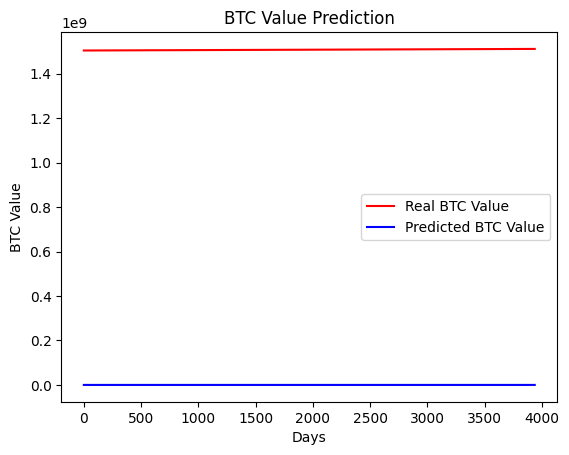

In [22]:
plt.plot(real_btc_price, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_btc_price, color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()